In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



df = pd.read_csv("data/ndtv_data_final.csv", index_col=0)
print(df.isna().any().any())
df.info()

False
<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1358
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1359 non-null   object 
 1   Brand                   1359 non-null   object 
 2   Model                   1359 non-null   object 
 3   Battery capacity (mAh)  1359 non-null   int64  
 4   Screen size (inches)    1359 non-null   float64
 5   Touchscreen             1359 non-null   object 
 6   Resolution x            1359 non-null   int64  
 7   Resolution y            1359 non-null   int64  
 8   Processor               1359 non-null   int64  
 9   RAM (MB)                1359 non-null   int64  
 10  Internal storage (GB)   1359 non-null   float64
 11  Rear camera             1359 non-null   float64
 12  Front camera            1359 non-null   float64
 13  Operating system        1359 non-null   object 
 14  Wi-Fi                   1359 non-null  

In [3]:
categorical = ["Brand","Touchscreen","Operating system","Wi-Fi","Bluetooth","GPS","3G","4G/ LTE"]

label_enc = LabelEncoder()

# encode categorical 
encodings = {}
reverse_encodings = {}
for col in categorical:
    label_enc.fit(df[col])
    transforms = label_enc.transform(label_enc.classes_)
    encodings[col] = dict(zip(label_enc.classes_, map(int, transforms)))
    reverse_encodings[col] = dict(zip(map(int, transforms), label_enc.classes_))

print(encodings)

df[categorical] = df[categorical].apply(lambda col: label_enc.fit_transform(col))

# convert INR to USD as of 10/22
df["Price"] = round(df["Price"] * 0.012, 2)
df["RAM"] = df["RAM (MB)"] / 1000

df = df.drop(columns=["Name", "Model", "RAM (MB)"])

# change column names
col_rename = {
    "Battery capacity (mAh)" : "Battery",
    "Internal storage (GB)" : "Storage",
    "Operating system" : "OS",
    "Wi-Fi" : "WiFi",
    "4G/ LTE": "4G",
    "Screen size (inches)" : "Screen size",
    "Number of SIMs" : "nSIM"
}

df.rename(columns=col_rename, inplace=True)

{'Brand': {'10.or': 0, 'Acer': 1, 'Alcatel': 2, 'Apple': 3, 'Aqua': 4, 'Asus': 5, 'Billion': 6, 'Black Shark': 7, 'BlackBerry': 8, 'Blu': 9, 'Cat': 10, 'Celkon': 11, 'Comio': 12, 'Coolpad': 13, 'Gionee': 14, 'Google': 15, 'HP': 16, 'HTC': 17, 'Homtom': 18, 'Honor': 19, 'Huawei': 20, 'InFocus': 21, 'Infinix': 22, 'Intex': 23, 'Itel': 24, 'Jio': 25, 'Jivi': 26, 'Karbonn': 27, 'Kult': 28, 'LG': 29, 'Lava': 30, 'LeEco': 31, 'Lenovo': 32, 'Lephone': 33, 'Lyf': 34, 'M-tech': 35, 'Meizu': 36, 'Micromax': 37, 'Microsoft': 38, 'Mobiistar': 39, 'Motorola': 40, 'Nokia': 41, 'Nubia': 42, 'Nuu Mobile': 43, 'OnePlus': 44, 'Onida': 45, 'Oppo': 46, 'Panasonic': 47, 'Phicomm': 48, 'Philips': 49, 'Poco': 50, 'Razer': 51, 'Reach': 52, 'Realme': 53, 'Samsung': 54, 'Sansui': 55, 'Smartron': 56, 'Sony': 57, 'Spice': 58, 'Swipe': 59, 'TCL': 60, 'Tambo': 61, 'Tecno': 62, 'Videocon': 63, 'Vivo': 64, 'Xiaomi': 65, 'Xolo': 66, 'Yu': 67, 'ZTE': 68, 'Zen': 69, 'Ziox': 70, 'Zopo': 71, 'Zuk': 72, 'iBall': 73, 'iVoom

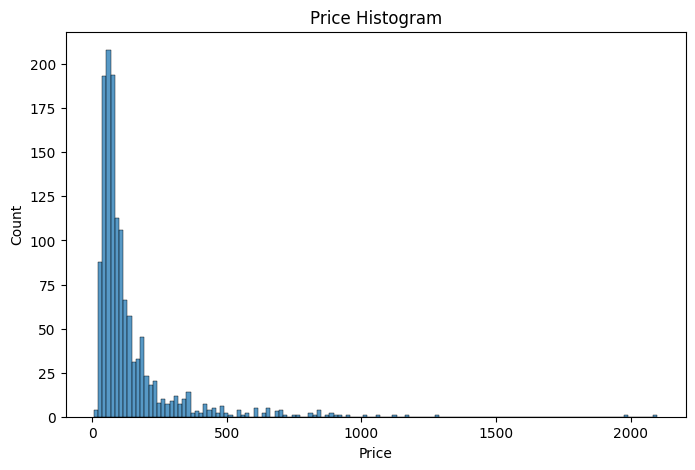

In [392]:
plt.figure(figsize=(8,5))

sns.histplot(df['Price'])
plt.title('Price Histogram')
plt.show()

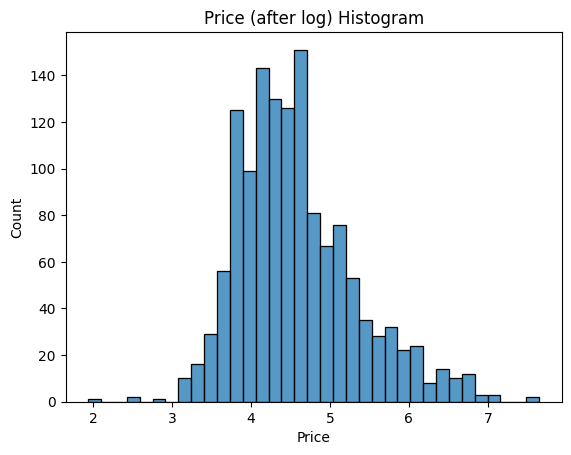

In [4]:
df["Price"] = np.log1p(df["Price"])
plt.title('Price (after log) Histogram')
sns.histplot(df['Price'])
plt.show()

In [5]:
df.head()

,Brand,Battery,Screen size,Touchscreen,Resolution x,Resolution y,Processor,Storage,Rear camera,Front camera,OS,WiFi,Bluetooth,GPS,nSIM,3G,4G,Price,RAM
0,44,4085,6.67,1,1440,3120,8,256.0,48.0,16.0,0,1,1,1,2,1,1,6.563827,12.0
1,53,4000,6.50,1,1080,2400,8,64.0,64.0,16.0,0,1,1,1,2,1,1,5.820053,6.0
2,3,3969,6.50,1,1242,2688,6,64.0,12.0,12.0,6,1,1,1,2,1,1,7.157580,4.0
3,3,3110,6.10,1,828,1792,6,64.0,12.0,12.0,6,1,1,1,2,1,1,6.627777,4.0
4,29,4000,6.40,1,1080,2340,8,128.0,12.0,32.0,0,1,1,1,1,0,0,6.398395,6.0


In [6]:
df.describe()

,Brand,Battery,Screen size,Touchscreen,Resolution x,Resolution y,Processor,Storage,Rear camera,Front camera,OS,WiFi,Bluetooth,GPS,nSIM,3G,4G,Price,RAM
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,37.951435,2938.489330,5.291310,0.987491,811.543046,1490.777778,5.551141,30.654864,12.070199,7.037969,0.178072,0.994113,0.988962,0.920530,1.833701,0.893304,0.744665,4.582614,2.488778
std,19.184224,873.514133,0.671357,0.111184,270.707271,557.780120,2.196562,36.950241,8.948337,6.295448,0.920598,0.076527,0.104517,0.270571,0.374457,0.308840,0.436210,0.754134,1.664440
min,0.000000,1010.000000,2.400000,0.000000,240.000000,320.000000,1.000000,0.064000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.935860,0.064000
25%,23.000000,2300.000000,5.000000,1.000000,720.000000,1280.000000,4.000000,8.000000,8.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,4.063194,1.000000
50%,37.000000,3000.000000,5.200000,1.000000,720.000000,1280.000000,4.000000,16.000000,12.200000,5.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.442534,2.000000
75%,54.000000,3500.000000,5.700000,1.000000,1080.000000,1920.000000,8.000000,32.000000,13.000000,8.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.976665,3.000000
max,75.000000,6000.000000,7.300000,1.000000,2160.000000,3840.000000,10.000000,512.000000,108.000000,48.000000,6.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,7.650112,12.000000


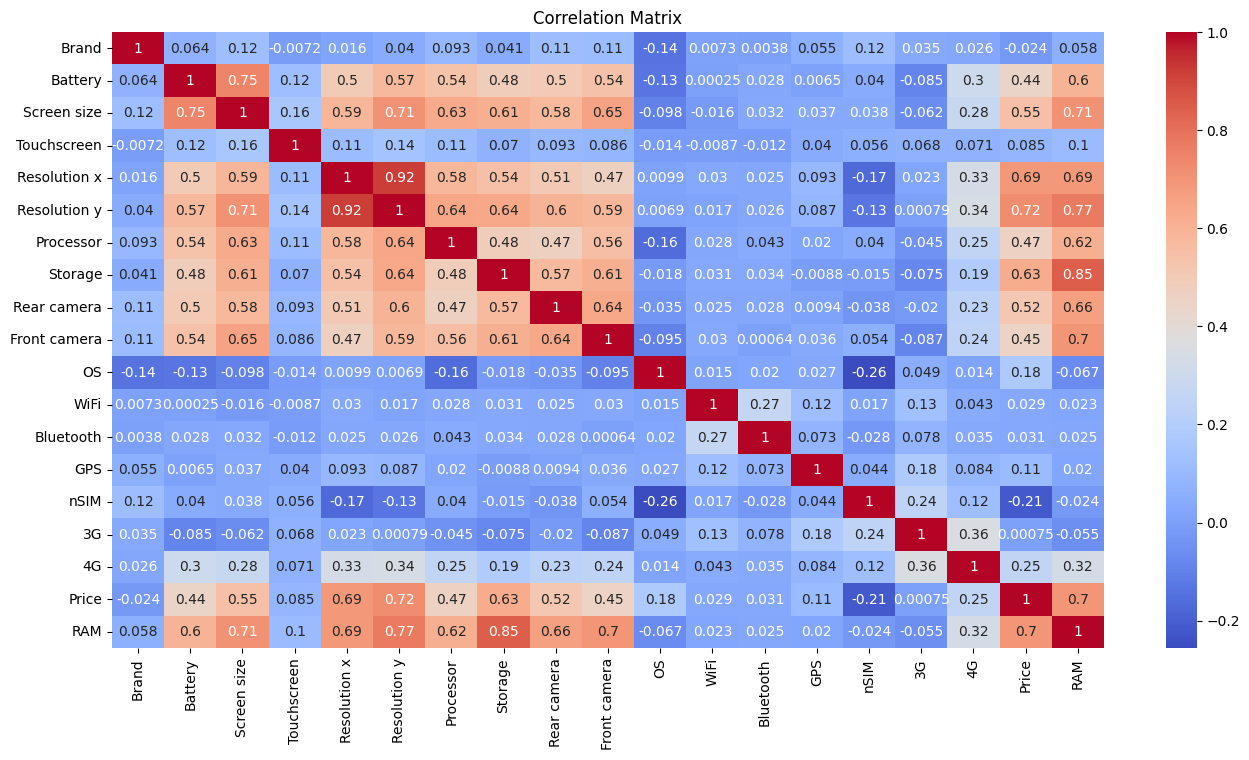

In [7]:
corr_matrix = df.corr()

np.round(corr_matrix, decimals=2)

plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [397]:
df = df.drop(columns=["3G", "Bluetooth", "WiFi","Touchscreen"])

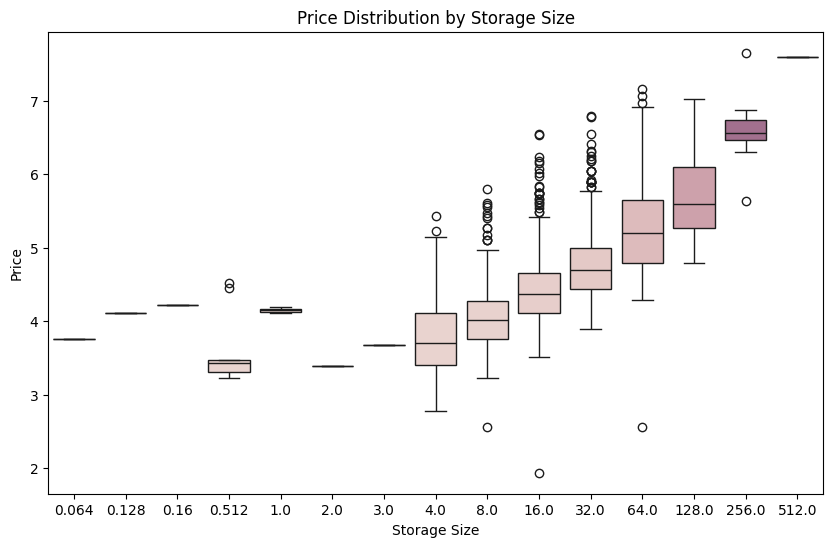

In [398]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Storage', y='Price', data=df, hue="Storage", legend=False)
plt.title('Price Distribution by Storage Size')
plt.xlabel('Storage Size')
plt.ylabel('Price')
plt.show()

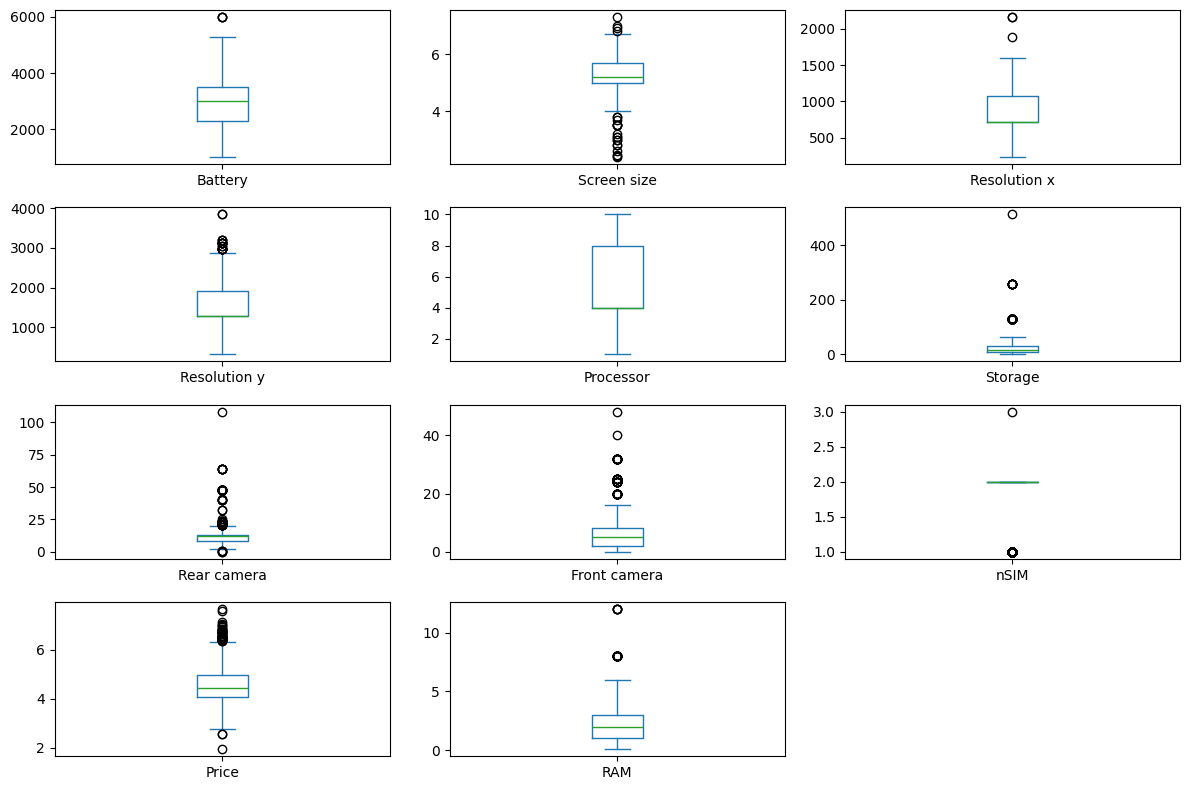

In [399]:
df_to_plot = df.drop(columns=["Brand", "OS", "GPS", "4G"])
num_columns = len(df_to_plot.columns)
rows = (num_columns // 3) + 1  # To arrange plots in 3 columns, adjust rows accordingly
df_to_plot.plot(kind='box', subplots=True, layout=(rows, 3), figsize=(12, rows * 2), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

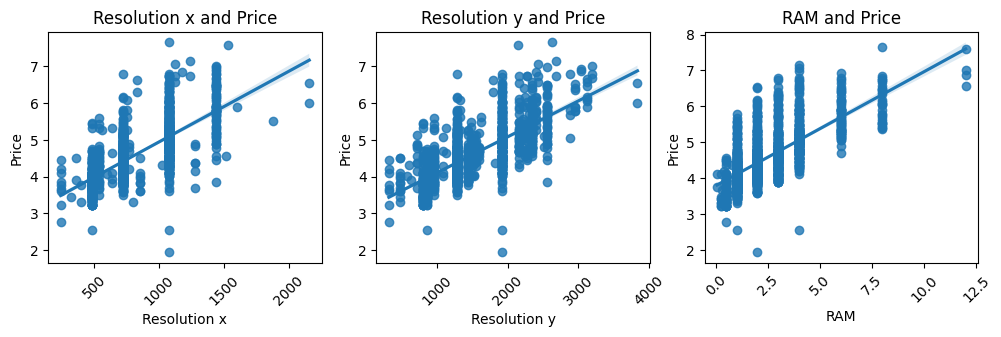

In [400]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
sns.regplot(x='Resolution x', y='Price', data=df)

plt.title('Resolution x and Price')
plt.xticks(rotation=45)
plt.xlabel('Resolution x')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
sns.regplot(x='Resolution y', y='Price', data=df)

plt.title('Resolution y and Price')
plt.xticks(rotation=45)
plt.xlabel('Resolution y')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
sns.regplot(x='RAM', y='Price', data=df)

plt.title('RAM and Price')
plt.xticks(rotation=45)
plt.xlabel('RAM')
plt.ylabel('Price')

plt.show()

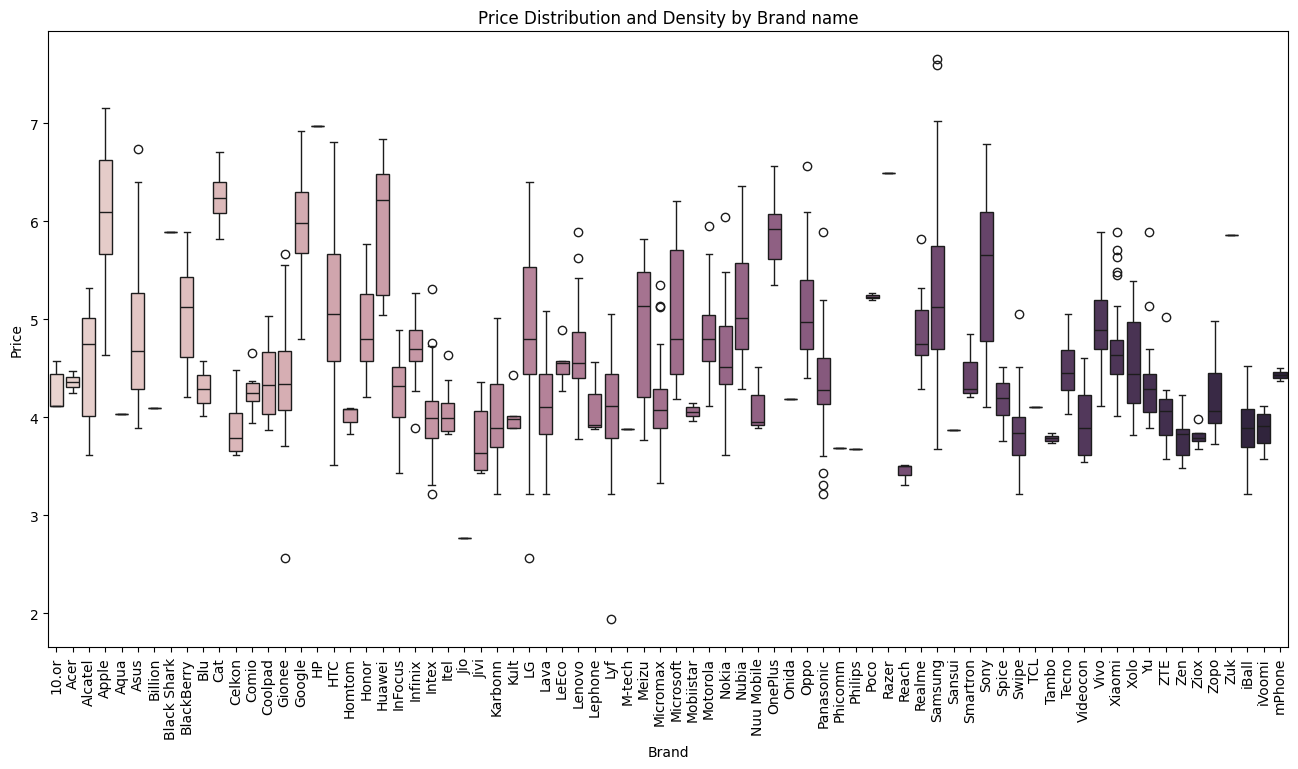

In [401]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Brand', y='Price', data=df, hue="Brand", legend=False)

plt.title('Price Distribution and Density by Brand name')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(ticks=list(reverse_encodings["Brand"].keys()), labels=list(reverse_encodings["Brand"].values()), rotation=90)


plt.show()


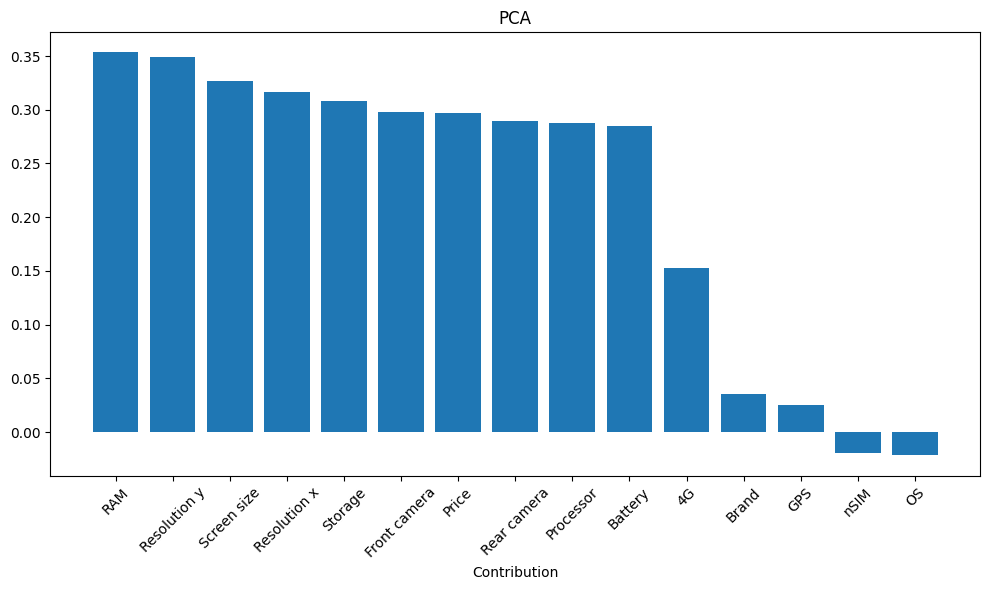

In [402]:
# PCA
def pca(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    pca = PCA()
    pca.fit(scaled_data)
    
    components = pca.components_[0]
    
    contributions_df = pd.DataFrame({
        'Feature': df.columns,
        'Contribution': components
    })
    
    contributions_df = contributions_df.sort_values(by='Contribution')[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.bar(contributions_df['Feature'], contributions_df['Contribution'])
    plt.xlabel('Contribution')
    plt.xticks(rotation=45)
    plt.title("PCA")
    plt.tight_layout()
    plt.show()
pca(df)


In [403]:
# drop low variance columns
#df = df.drop(columns=["GPS", "nSIM", "OS"])
df.to_csv("processed.csv")